Jialin Shi 

UID:7948542502


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.metrics import confusion_matrix          
from sklearn.metrics import f1_score                  
from sklearn.metrics import accuracy_score            

## c－i

## c-ii

In [2]:
# create a dataframe 88rows*42columns
col_name=['min_1','max_1','mean_1','median_1','std_1','25%_1','75%_1',
          'min_2','max_2','mean_2','median_2','std_2','25%_2','75%_2',
          'min_3','max_3','mean_3','median_3','std_3','25%_3','75%_3',
          'min_4','max_4','mean_4','median_4','std_4','25%_4','75%_4',
          'min_5','max_5','mean_5','median_5','std_5','25%_5','75%_5',
          'min_6','max_6','mean_6','median_6','std_6','25%_6','75%_6',
          ]
table = pd.DataFrame(columns=col_name,index = range(1,89))


In [3]:
# insert 85 datasets except for bending2-datasets456.
k = 0
for i in [['lying',15],['sitting',15],['standing',15],['walking',15],['cycling',15],['bending1',7],['bending2',3]]:
    for j in range(i[1]):
        add = i[0]+'/dataset'+str(j+1)+'.csv'
        ins = pd.read_csv(add,skiprows=4,header=0)
        df = ins.describe()
        df.drop([df.columns[0]],axis =1,inplace = True)
        df1 = df.iloc[[3,-1,1,-3,2,-4,-2],:]
        dataset = df1.T.values.ravel().reshape(1,-1)[0].tolist()
        table.iloc[k,:] = dataset
        k = k+1

In [4]:
# load bending2-dataset4 to row86
b2d4 = pd.read_csv('bending2/dataset4.csv',skiprows=4,header=0)
b2d4=b2d4.iloc[:,0].str.split(expand=True)
b2d4.drop([b2d4.columns[0]],axis =1,inplace = True)
b2d4.columns=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
b2d4 = pd.DataFrame(b2d4,dtype=np.float)
df = b2d4.describe()
df1 = df.iloc[[3,-1,1,-3,2,-4,-2],:]
dataset = df1.T.values.ravel().reshape(1,-1)[0].tolist()
table.iloc[85,:]=dataset

# load bending2 - dataset5 to row 87
bend2 = pd.read_csv('bending2/dataset5.csv',skiprows=4,header=0)
df = bend2.describe()
df.drop([df.columns[0]],axis =1,inplace = True)
df1 = df.iloc[[3,-1,1,-3,2,-4,-2],:]
dataset = df1.T.values.ravel().reshape(1,-1)[0].tolist()
table.iloc[86,:]=dataset

# load bending2 - dataset6 to row 88
bend2 = pd.read_csv('bending2/dataset6.csv',skiprows=4,header=0)
df = bend2.describe()
df.drop([df.columns[0]],axis =1,inplace = True)
df1 = df.iloc[[3,-1,1,-3,2,-4,-2],:]
dataset = df1.T.values.ravel().reshape(1,-1)[0].tolist()
table.iloc[87,:]=dataset


In [5]:
table.tail(4)

,min_1,max_1,mean_1,median_1,std_1,25%_1,75%_1,min_2,max_2,mean_2,...,std_5,25%_5,75%_5,min_6,max_6,mean_6,median_6,std_6,25%_6,75%_6
85,21,50,32.5862,33,6.23814,26.1875,34.5,0,9.9,0.516125,...,5.03242,17.67,23.5,0,13.61,1.16204,0.83,1.33298,0.47,1.3
86,27.5,33,29.8819,30,1.15384,29,30.27,0,1,0.256438,...,1.74597,17,19,0,6.4,0.701625,0.71,0.481103,0.47,0.94
87,19,45.5,30.9381,29,7.68415,26.75,38,0,6.4,0.467167,...,5.84591,15,20.8125,0,6.73,1.10735,0.83,1.08084,0.47,1.3
88,25,47.5,31.0582,29.71,4.82979,27.5,31.8125,0,6.38,0.405458,...,7.85343,9,18.3125,0,4.92,1.0981,0.94,0.83148,0.5,1.3


In [6]:
# split test set
table['set']=pd.Series()
table.iloc[[0,1,2,15,16,17,30,31,32,45,46,47,60,61,62,75,76,82,83],42]='test'

In [7]:
# split train set
table['set']=table['set'].replace(np.NaN,'train')
table['class']=pd.Series()
table.iloc[0:15,43]='lying'
table.iloc[15:30,43]='sitting'
table.iloc[30:45,43]='standing'
table.iloc[45:60,43]='walking'
table.iloc[60:75,43]='cycling'
table.iloc[75:82,43]='bending1'
table.iloc[82:88,43]='bending2'
table.head(10)

,min_1,max_1,mean_1,median_1,std_1,25%_1,75%_1,min_2,max_2,mean_2,...,75%_5,min_6,max_6,mean_6,median_6,std_6,25%_6,75%_6,set,class
1,23.5,30,27.7164,27.5,1.44225,27,29,0,1.79,0.363688,...,10.75,0,4.5,0.734271,0.71,0.613688,0.43,1,test,lying
2,24.75,48.33,44.1829,48,7.49562,48,48,0,3.11,0.101875,...,5.5425,0,3.91,0.692771,0.5,0.675781,0.3225,0.94,test,lying
3,48,48.25,48.0042,48,0.0320382,48,48,0,0.43,0.00716667,...,10,0,2.5,0.641229,0.5,0.388372,0.46,0.83,test,lying
4,34,51,42.7061,40.5,3.53748,40.25,48,0,4.85,0.519813,...,8,0,4.97,0.549313,0.47,0.648403,0,0.83,train,lying
5,39,41,39.6678,39.5,0.280158,39.5,39.75,0,1,0.583604,...,9.33,0,3.49,0.635938,0.5,0.608399,0,0.83,train,lying
6,0,40.67,39.5062,39.5,1.8175,39.5,39.67,0,1,0.496479,...,13,0,3.19,0.622917,0.5,0.498889,0.43,0.87,train,lying
7,39,40,39.4338,39.5,0.208558,39.33,39.5,0,1,0.422104,...,12.33,0,4.06,0.582708,0.5,0.438442,0.43,0.83,train,lying
8,39,40,39.3471,39.33,0.231405,39.25,39.5,0,0.5,0.366396,...,17.67,0,3.5,0.588458,0.5,0.423435,0.43,0.83,train,lying
9,39,56.25,47.3251,42.67,5.96128,42,54,0,8.49,0.274313,...,18,0,5.72,0.766167,0.5,0.723953,0.43,1,train,lying
10,23.5,30,27.7164,27.5,1.44225,27,29,0,1.79,0.363688,...,10.75,0,4.5,0.735396,0.71,0.612834,0.43,1,train,lying


c-ii

Create table 88 rows, 42 feature columns, 2 label columns(test/train, class)

## c-iii - bootstrap

In [8]:
# turn table str into float
table2 = pd.DataFrame(table.iloc[:,:-2],dtype=np.float)
table2['set']=table['set']
table2['class']=table['class']

In [9]:
table2.head()

,min_1,max_1,mean_1,median_1,std_1,25%_1,75%_1,min_2,max_2,mean_2,...,75%_5,min_6,max_6,mean_6,median_6,std_6,25%_6,75%_6,set,class
1,23.50,30.00,27.716375,27.5,1.442253,27.00,29.00,0.0,1.79,0.363688,...,10.7500,0.0,4.50,0.734271,0.71,0.613688,0.4300,1.00,test,lying
2,24.75,48.33,44.182937,48.0,7.495615,48.00,48.00,0.0,3.11,0.101875,...,5.5425,0.0,3.91,0.692771,0.50,0.675781,0.3225,0.94,test,lying
3,48.00,48.25,48.004167,48.0,0.032038,48.00,48.00,0.0,0.43,0.007167,...,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.4600,0.83,test,lying
4,34.00,51.00,42.706063,40.5,3.537476,40.25,48.00,0.0,4.85,0.519813,...,8.0000,0.0,4.97,0.549313,0.47,0.648403,0.0000,0.83,train,lying
5,39.00,41.00,39.667833,39.5,0.280158,39.50,39.75,0.0,1.00,0.583604,...,9.3300,0.0,3.49,0.635938,0.50,0.608399,0.0000,0.83,train,lying


In [10]:
#bootstrap 1000 times
k = 0
for k in range(0,42):
    std=[]
    for a in range(1,1001):
        feature=np.array(table2.iloc[:,k])
        a = np.random.choice(feature,size=88,replace=True,p=None)
        std.append(a.std())
    sort=sorted(std)
    print('90% of',col_name[k],'[',sort[49],sort[949],']')
#    print(k)

90% of min_1 [ 8.194090934305613 10.581465355894515 ]
90% of max_1 [ 3.277016048374138 5.226489337296298 ]
90% of mean_1 [ 4.6653419875397 5.817853492865863 ]
90% of median_1 [ 4.779746542910284 5.964751170909194 ]
90% of std_1 [ 1.5699533539774866 1.9495705408724202 ]
90% of 25%_1 [ 5.509098176536494 6.622978742759204 ]
90% of 75%_1 [ 4.278987851714931 5.770053989944548 ]
90% of min_2 [ 0.0 0.0 ]
90% of max_2 [ 4.605051561468231 5.373192060921861 ]
90% of mean_2 [ 1.3844787401470295 1.6878260666217209 ]
90% of median_2 [ 1.2229442912660777 1.530029657925699 ]
90% of std_2 [ 0.7999704470147303 0.9371117085209092 ]
90% of 25%_2 [ 0.8226120739406416 1.03419415693357 ]
90% of 75%_2 [ 1.90349833915594 2.292707917403521 ]
90% of min_3 [ 2.7505900357810535 3.1009173841704354 ]
90% of max_3 [ 4.127437845553214 5.452859728860075 ]
90% of mean_3 [ 3.3812316051261573 4.435115646320125 ]
90% of median_3 [ 3.4700743581566607 4.515331611690669 ]
90% of std_3 [ 0.7654507878193805 1.121632669505596 ]

## c-iv  (max,75%,mean)

most important three features: 
according to bootstrap results
for each time serie has best 3 features as:
min_1,25%_1,median_1
max_2,75%_2,mean_2
max_3,25%_2,75%_3
max_4,75%_4，mean_4
min_5,25%_5,median_5
max_6,75%_6,mean_6

Therefore, choose the most used three.
max,75%,mean

## d-i - plot bending/not bending

In [11]:
table2.head()

,min_1,max_1,mean_1,median_1,std_1,25%_1,75%_1,min_2,max_2,mean_2,...,75%_5,min_6,max_6,mean_6,median_6,std_6,25%_6,75%_6,set,class
1,23.50,30.00,27.716375,27.5,1.442253,27.00,29.00,0.0,1.79,0.363688,...,10.7500,0.0,4.50,0.734271,0.71,0.613688,0.4300,1.00,test,lying
2,24.75,48.33,44.182937,48.0,7.495615,48.00,48.00,0.0,3.11,0.101875,...,5.5425,0.0,3.91,0.692771,0.50,0.675781,0.3225,0.94,test,lying
3,48.00,48.25,48.004167,48.0,0.032038,48.00,48.00,0.0,0.43,0.007167,...,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.4600,0.83,test,lying
4,34.00,51.00,42.706063,40.5,3.537476,40.25,48.00,0.0,4.85,0.519813,...,8.0000,0.0,4.97,0.549313,0.47,0.648403,0.0000,0.83,train,lying
5,39.00,41.00,39.667833,39.5,0.280158,39.50,39.75,0.0,1.00,0.583604,...,9.3300,0.0,3.49,0.635938,0.50,0.608399,0.0000,0.83,train,lying


In [12]:
# make train set and test set
di_train = table2[table2['set']=='train']
di_test = table2[table2['set']=='test']
di_train['bending']=(di_train['class']=='bending1')|(di_train['class']=='bending2')

/Users/jialinshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


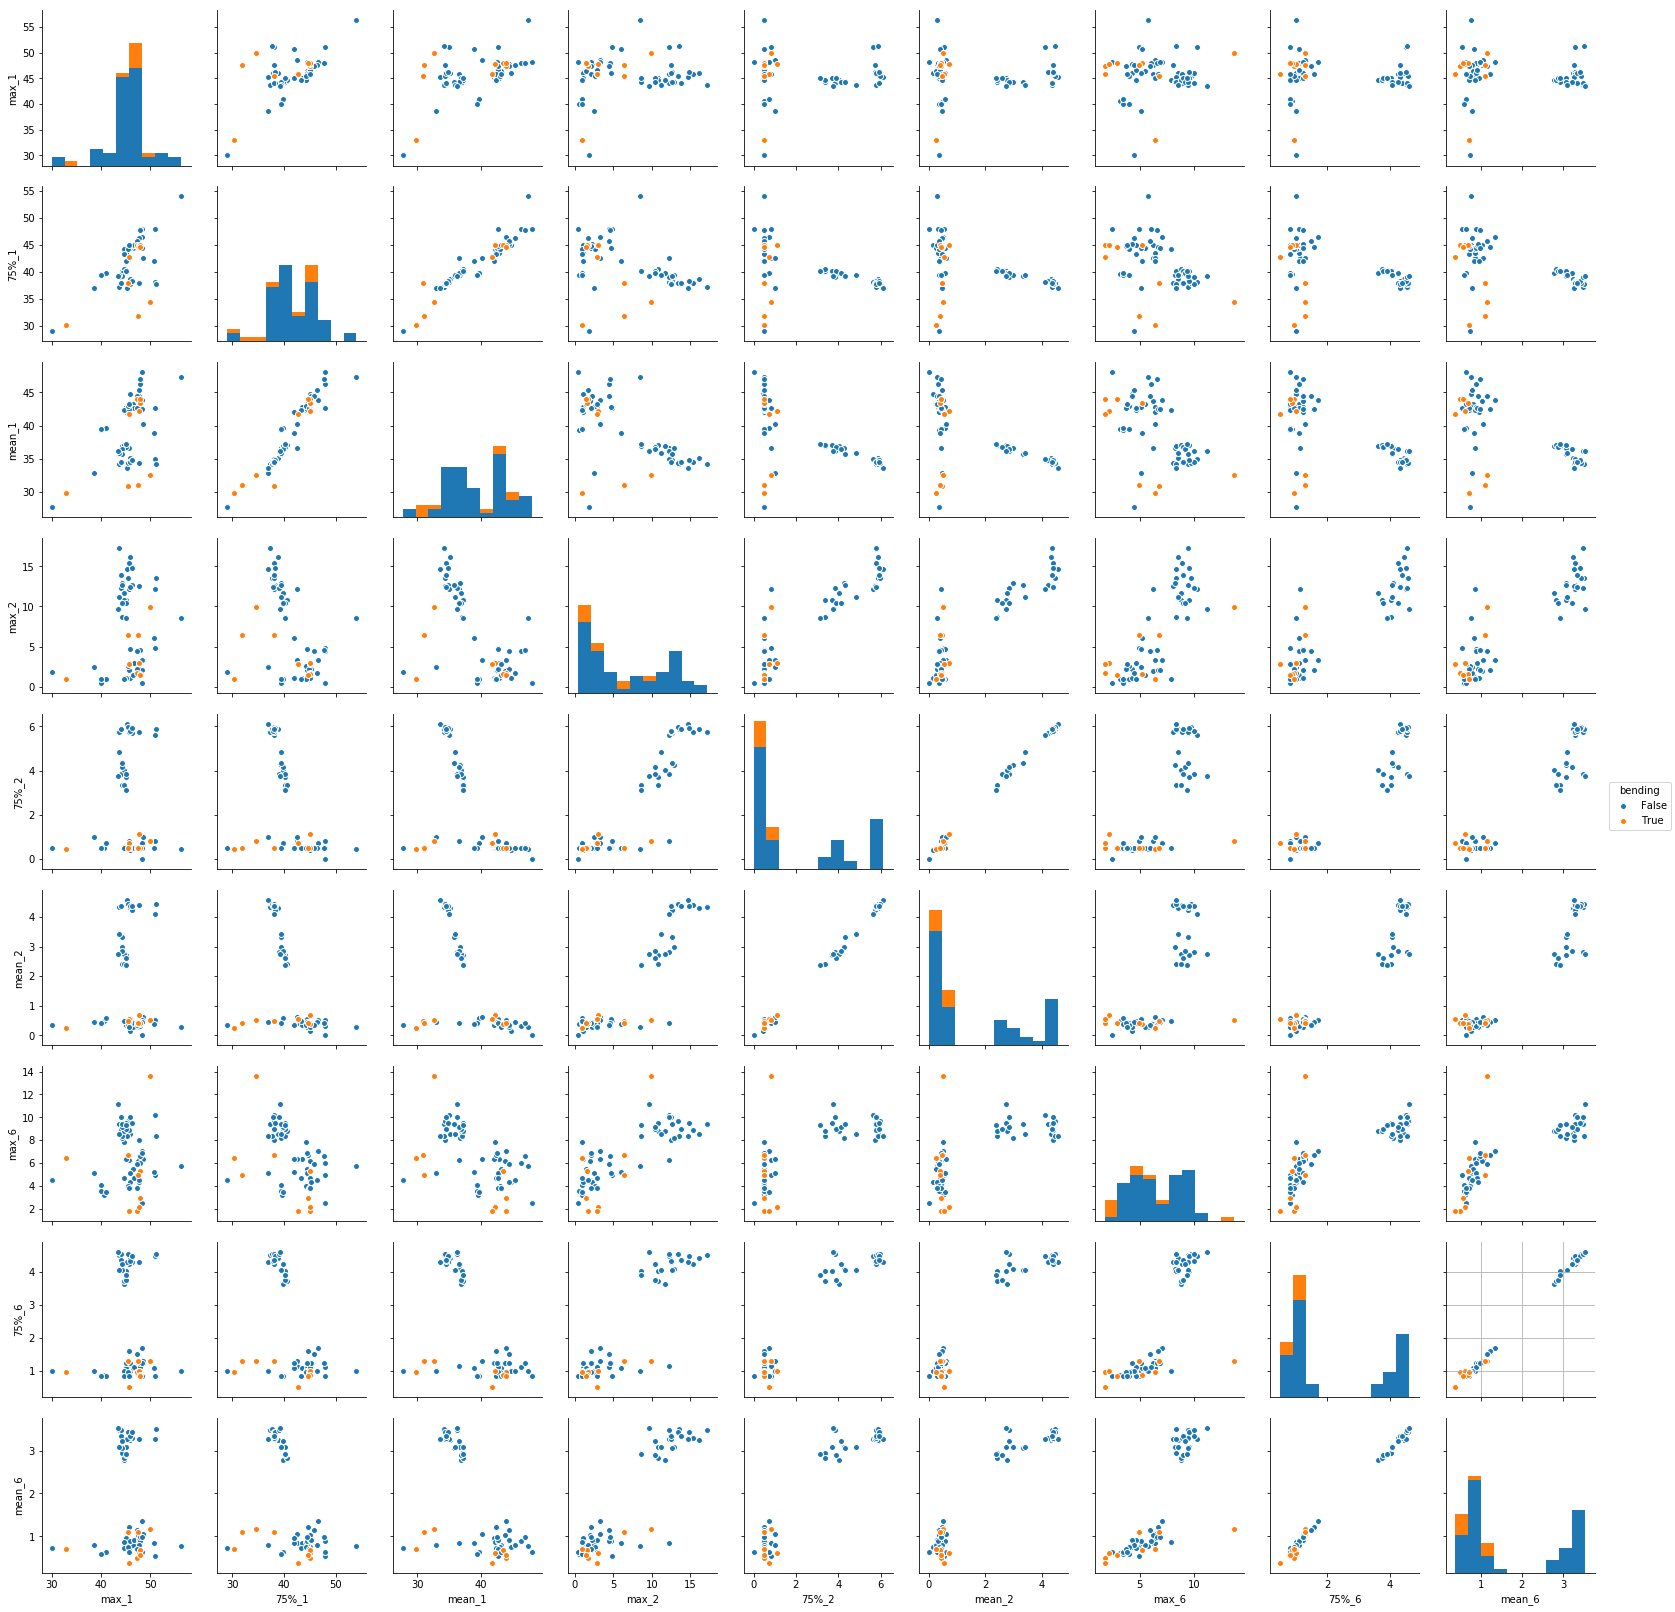

In [13]:
df3_train=di_train[['max_1','75%_1','mean_1','max_2','75%_2','mean_2','max_6','75%_6','mean_6','bending']]
sns.pairplot(df3_train,vars =['max_1','75%_1','mean_1','max_2','75%_2','mean_2','max_6','75%_6','mean_6'],hue='bending')
plt.grid()
plt.show()

## d-ii

In [14]:
# make a blank table for 69*12
col_name2=['max_1','75%_1','mean_1','max_2','75%_2','mean_2','max_3','75%_3','mean_3',
          'max_4','75%_4','mean_4','max_5','75%_5','mean_5','max_6','75%_6','mean_6',
          'max_7','75%_7','mean_7','max_8','75%_8','mean_8','max_9','75%_9','mean_9',
          'max_10','75%_10','mean_10','max_11','75%_11','mean_11','max_12','75%_12','mean_12']

d_ii = pd.DataFrame(index = range(0,69), columns=col_name2)


In [15]:
# load train dataset in lying,sitting, standing, walking, cycling, bending1, and bending2-ds356
k=0
for i in [['lying',15,3],['sitting',15,3],['standing',15,3],
          ['walking',15,3],['cycling',15,3],['bending1',7,2],
          ['bending2',3,2],['bending2',6,4]]:
    for j in range(i[1]):
        if j+1 in range(1,i[2]+1):
            continue
        else:
            add = i[0] + '/dataset'+ str(j+1)+ '.csv'
            data1 = pd.read_csv(add,skiprows=4,header=0)
            data1.drop(data1.columns[0],axis=1,inplace = True)
            if len(data1)%2==0:
                two = int(len(data1)/2)
                first = data1.iloc[:two,:8]
                second = data1.iloc[two:,:8]
            else:
                two =int((len(data1)-1)/2)
                first = data1.iloc[:two,:8]
                second = data1.iloc[two:-1,:8]
            second.index=range(two)
            second.columns=['pt2_avg_rss12','pt2_var_rss12','pt2_avg_rss13',
                            'pt2_var_rss13','pt2_avg_rss23','pt2_var_rss23']
            df_cat = pd.concat([first,second],axis=1,join_axes=[first.index])
            a = df_cat.describe().iloc[[-1,-2,1],:].T.values.ravel().reshape(1,-1)[0].tolist()
            d_ii.iloc[k,:]= a
            k=k+1
d_ii.tail()
    

,max_1,75%_1,mean_1,max_2,75%_2,mean_2,max_3,75%_3,mean_3,max_4,...,mean_9,max_10,75%_10,mean_10,max_11,75%_11,mean_11,max_12,75%_12,mean_12
64,45,44.5,43.4862,1.3,0.5,0.378667,26.33,18,16.3972,5.17,...,15.3388,3.56,0.8875,0.66975,26,23.5,21.882,2.96,0.83,0.58575
65,50,42,32.0144,9.9,0.5,0.587875,28.25,18,14.9879,7.4,...,12.8954,4.92,1.12,0.822833,24,20,18.4742,6.02,0.94,0.786042
66,39.25,36,29.1899,4.33,0.805,0.497042,25.33,18.5425,10.8458,4.02,...,18.3339,11.42,1.22,0.882625,36,25,18.6593,5.61,1.3,1.11492
67,47.5,39.3725,34.1106,6.38,0.83,0.5285,28.33,22.25,16.9969,5.32,...,13.5965,5.15,0.87,0.768542,18.25,13.75,10.9063,4.92,1.41,1.19996
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# load bending2 dataset4
#k=68
b2d4 = pd.read_csv('bending2/dataset4.csv',skiprows=4,header=0)
b2d4=b2d4.iloc[:,0].str.split(expand=True)
b2d4.drop([b2d4.columns[0]],axis =1,inplace = True)
two = int(len(data1)/2)
first = b2d4.iloc[:two,:8]
second = b2d4.iloc[two:,:8]
second.index=range(two)
second.columns=['pt2_avg_rss12','pt2_var_rss12','pt2_avg_rss13',
                'pt2_var_rss13','pt2_avg_rss23','pt2_var_rss23']
df_cat = pd.concat([first,second],axis=1,join_axes=[first.index])
df_cat = pd.DataFrame(df_cat,dtype=np.float)
a = df_cat.describe().iloc[[-1,-2,1],:].T.values.ravel().reshape(1,-1)[0].tolist()
d_ii.iloc[k,:]= a

In [17]:
d_ii.tail(3)

,max_1,75%_1,mean_1,max_2,75%_2,mean_2,max_3,75%_3,mean_3,max_4,...,mean_9,max_10,75%_10,mean_10,max_11,75%_11,mean_11,max_12,75%_12,mean_12
66,39.25,36,29.1899,4.33,0.805,0.497042,25.33,18.5425,10.8458,4.02,...,18.3339,11.42,1.22,0.882625,36,25,18.6593,5.61,1.3,1.11492
67,47.5,39.3725,34.1106,6.38,0.83,0.5285,28.33,22.25,16.9969,5.32,...,13.5965,5.15,0.87,0.768542,18.25,13.75,10.9063,4.92,1.41,1.19996
68,33,31.5,30.7124,1,0.5,0.298958,14.5,10.0625,7.05721,4.44,...,9.27529,2.5,0.5,0.357833,21.33,19.25,18.366,1.5,0.94,0.677917


In [18]:
# add class label
d_ii['class']=pd.Series()
d_ii.iloc[-9:,-1]='bending'
d_ii['class']=d_ii['class'].replace(np.NaN,'not_bending')
d_ii.tail(10)

,max_1,75%_1,mean_1,max_2,75%_2,mean_2,max_3,75%_3,mean_3,max_4,...,max_10,75%_10,mean_10,max_11,75%_11,mean_11,max_12,75%_12,mean_12,class
59,45,40.25,36.9542,8.18,3.27,2.39267,26.75,19.25,17.1215,8.05,...,7.83,3.77,2.82613,24.5,21.67,19.6439,9.34,3.8325,2.83808,not_bending
60,46.5,45,44.0572,1.5,0.5,0.381042,29.25,24,23.0968,2.74,...,4.44,0.71,0.501167,38.25,36.25,34.8834,1.5,0.71,0.388333,bending
61,47.75,45.25,43.2789,3,1,0.673292,30,24.8125,23.1412,4.77,...,5.15,1.48,1.17179,38.5,33.75,30.9657,2.18,0.87,0.586083,bending
62,45.75,44.25,41.6212,2.83,0.83,0.623083,28.25,24,19.0815,6.42,...,2.35,0.83,0.568667,36,30.5625,29.6358,1.5,0.5,0.3475,bending
63,48,45,44.117,1.3,0.5,0.250042,27,20,17.7442,10.03,...,5.21,0.8225,0.575708,26,23.75,22.8509,4.06,0.71,0.543875,bending
64,45,44.5,43.4862,1.3,0.5,0.378667,26.33,18,16.3972,5.17,...,3.56,0.8875,0.66975,26,23.5,21.882,2.96,0.83,0.58575,bending
65,50,42,32.0144,9.9,0.5,0.587875,28.25,18,14.9879,7.4,...,4.92,1.12,0.822833,24,20,18.4742,6.02,0.94,0.786042,bending
66,39.25,36,29.1899,4.33,0.805,0.497042,25.33,18.5425,10.8458,4.02,...,11.42,1.22,0.882625,36,25,18.6593,5.61,1.3,1.11492,bending
67,47.5,39.3725,34.1106,6.38,0.83,0.5285,28.33,22.25,16.9969,5.32,...,5.15,0.87,0.768542,18.25,13.75,10.9063,4.92,1.41,1.19996,bending
68,33,31.5,30.7124,1,0.5,0.298958,14.5,10.0625,7.05721,4.44,...,2.5,0.5,0.357833,21.33,19.25,18.366,1.5,0.94,0.677917,bending


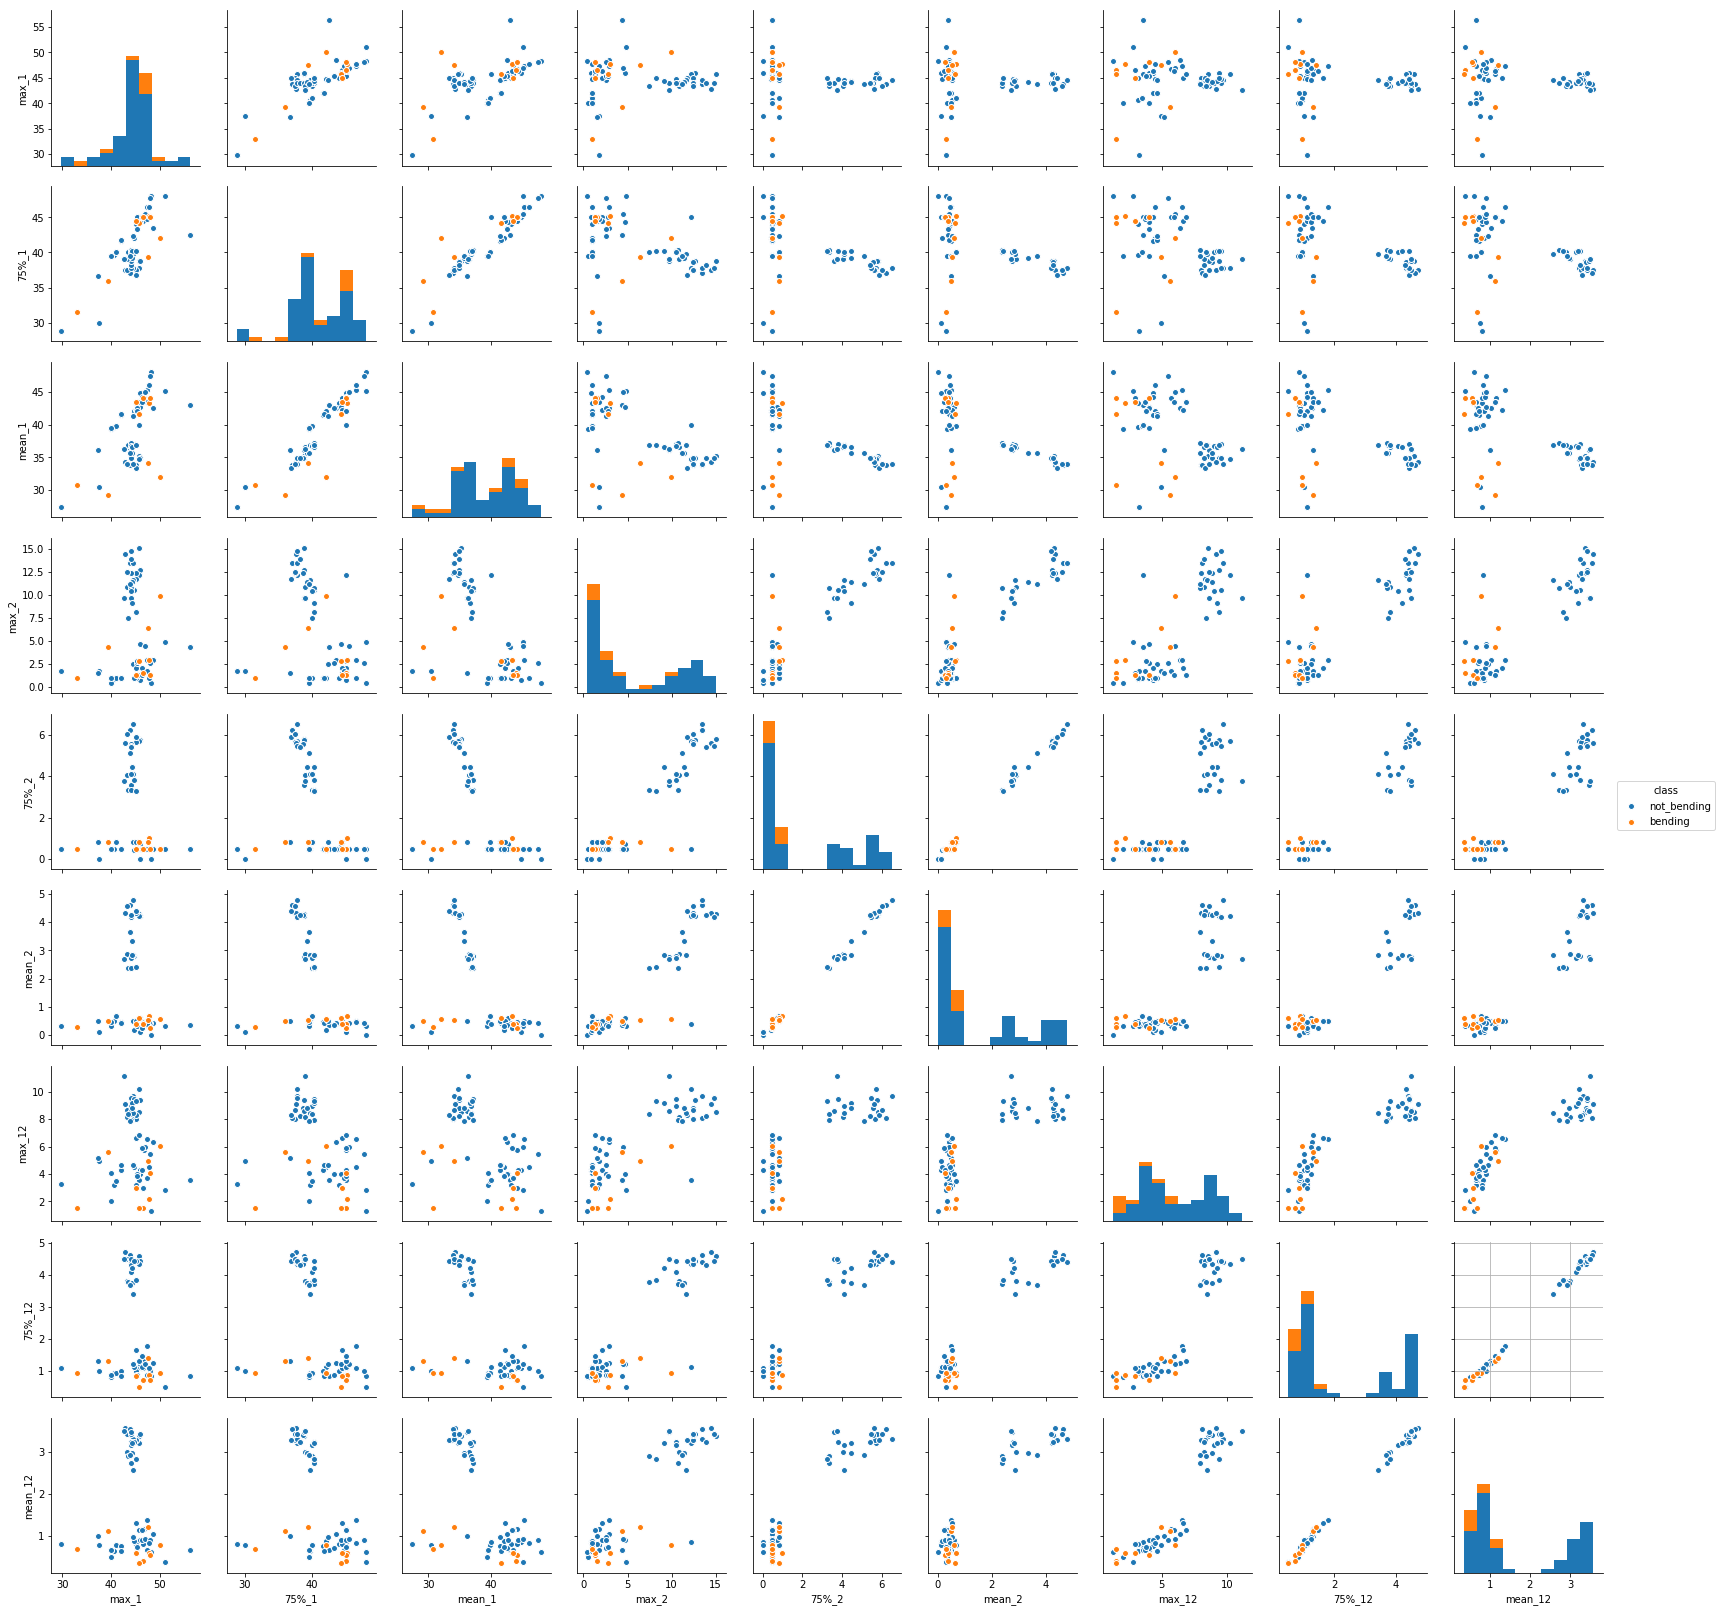

In [19]:
dfii=d_ii[['max_1','75%_1','mean_1','max_2','75%_2','mean_2','max_12','75%_12','mean_12','class']]
sns.pairplot(dfii,vars =['max_1','75%_1','mean_1','max_2','75%_2','mean_2','max_12','75%_12','mean_12'],hue='class')
plt.grid()
plt.show()

Conclusion for d-ii

Compare the plot of d-i with d-ii, 

I don't see any considerable difference in the results with those of 1(d)i. The result seem to be consistent.


## d-iii

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression 

### Explanation
The right way to do this is to use cross validation when do feature selections, and after that use cross validation again to predict the test error for model assessment.

Wrong way is use the entire train set to do feature selections, and then use cross validation to predict test error for model assessment.

In [21]:
l_list=np.arange(1,21)

best_p=[]
best_score=0
best_model=0
score=[]
for l in l_list:
    print(l)
    df_d3=pd.DataFrame()
    file_list=[['bending1',2,7],['bending2',2,6],['cycling',3,15],['lying',3,15],['sitting',3,15],['standing',3,15],['walking',3,15]]
    for i in file_list:
        Label=i[0]
        for j in range(i[1]):
            add=i[0]+'/dataset'+str(j+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='test'
            table.append(Set)
            table.append(Label)
            df_d3=df_d3.append([table])
        for k in range(i[1],i[2]):
            add=i[0]+'/dataset'+str(k+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            
            if (i[0]=='bending2')&(k+1==4):
                add=i[0]+'/dataset'+str(k+1)+'.csv'
                data=pd.read_csv(add,skiprows=5,sep=' ',header=None,index_col=0)
                data.drop(7,axis=1,inplace=True)
                num=len(data)//l
                data_tem=data.iloc[0:num,:]
                for h in range(1,l):
                    data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
                table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='train'
            table.append(Set)
            table.append(Label)
            df_d3=df_d3.append([table])
            
    #Data processing
    df_d3=df_d3[df_d3.iloc[:,-2]=='train']
    df_d3['bending']=(df_d3.iloc[:,-1]=='bending1')|(df_d3.iloc[:,-1]=='bending2')
    #Find out the best P
    X=df_d3.iloc[:,:-3]
    Y=df_d3.iloc[:,-1]
    model=LogisticRegression(solver='liblinear',C=10**20) 
    rfe=RFECV(model,cv=5,scoring='accuracy')
    rfe.fit(X,Y)
#    score1= rfe.score(X,Y)
    score.append(cross_val_score(rfe,X,Y,cv=5,scoring='accuracy').mean())
    if best_score<score[-1]:
        best_score=score[-1]
        best_rfe=rfe
        best_X=X
        best_Y=Y
    best_p.append(len(rfe.support_[rfe.support_==True]))        
result=pd.DataFrame([l_list,best_p,score],index=['l','p','score'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [22]:
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
l,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000
p,4.000000,4.000000,4.000000,4.000000,16.000000,11.000000,16.000000,3.000000,23.000000,8.000000,2.000000,6.000000,5.000000,4.000000,34.000000,7.000000,17.000000,18.000000,6.000000,12.000000
score,0.985714,0.971429,0.957143,0.971429,0.942857,0.942857,0.957143,0.942857,0.942857,0.942857,0.971429,0.957143,0.957143,0.942857,0.942857,0.956044,0.957143,0.957143,0.957143,0.957143


#### Best Pair (1,4)
For L in range(1,21), each L has best_p and its score.

Best pair is (1,4) with the score of 0.9857

## d-iv

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [24]:
# coefficient
best_rfe.estimator_.coef_

array([[-4.29165515,  2.54675865,  3.13672556,  3.64323171]])

Best_rfe model coefficient for 4 parameters.

array([[-4.29165515,  2.54675865,  3.13672556,  3.64323171]])

In [25]:
best_rfe.support_.reshape(6,7)

array([[False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [ True,  True, False, False, False,  True, False],
       [False, False, False, False, False, False, False]])

In [26]:
# get param columns loc
ind=np.where(best_rfe.support_==True)[0]
ind
#table2.iloc[0:2,ind]

array([ 6, 28, 29, 33])

Column index for best 4 parameters are [6,28,29,33]

In [27]:
best_X.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.00,0.94
0,33.00,47.75,42.179813,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00
0,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50
0,37.00,48.00,43.454958,43.25,1.386098,42.50,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.00,0.0,5.26,0.679646,0.50,0.622534,0.43,0.87
0,36.25,48.00,43.969125,44.50,1.618364,43.31,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.75,0.0,2.96,0.555313,0.49,0.487826,0.00,0.83


In [28]:
# 变成array
type(best_rfe.transform(best_X))

numpy.ndarray

In [29]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2

# get p-values
X=best_X.iloc[:,ind]
Y=best_Y
scores, pvalues = chi2(X, Y)
pvalues

array([3.99688063e-01, 2.78982384e-36, 3.22181328e-12, 3.92403389e-13])

Best_rfe model p-values for 4 bet parameters are 

([3.99688063e-01, 2.78982384e-36, 3.22181328e-12, 3.92403389e-13])

In [30]:
#model=LogisticRegression(solver='liblinear') 
y_train_pred=best_rfe.estimator_.predict(best_rfe.transform(best_X))
confusion_matrix(best_Y, y_train_pred)

array([[60,  0],
       [ 0,  9]])

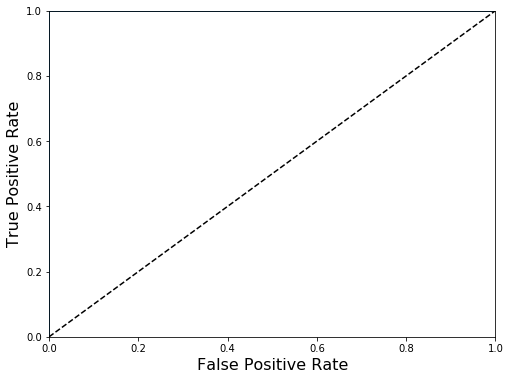

In [31]:
from sklearn.metrics import roc_curve
y_scores =best_rfe.estimator_.decision_function(best_rfe.transform(best_X))
fpr, tpr, thresholds = roc_curve(best_Y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [32]:
# Area under curve
from sklearn.metrics import roc_auc_score
roc_auc_score(best_Y, y_scores)

1.0

Auc = 1

## d-v

In [33]:
# prepare test set
di_test['bending']=(di_test['class']=='bending1')|(di_test['class']=='bending2')
di_test.tail(10)


/Users/jialinshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,min_1,max_1,mean_1,median_1,std_1,25%_1,75%_1,min_2,max_2,mean_2,...,min_6,max_6,mean_6,median_6,std_6,25%_6,75%_6,set,class,bending
46,19.33,43.50,34.227771,35.500,4.889576,30.5000,37.7500,0.0,14.50,3.995729,...,0.0,9.74,3.394125,3.100,1.792090,2.105,4.425,test,walking,False
47,12.50,45.00,33.509729,34.125,4.850923,30.5000,36.7500,0.0,13.05,4.450771,...,0.0,8.96,3.378479,3.085,1.787360,2.060,4.440,test,walking,False
48,15.00,46.75,34.660583,35.000,5.315110,31.0000,38.2500,0.0,13.44,4.200896,...,0.0,8.99,3.244396,3.000,1.630983,2.120,4.240,test,walking,False
61,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,0.0,9.34,2.921729,2.500,1.852600,1.500,3.900,test,cycling,False
62,28.75,44.75,37.561188,36.875,3.226507,35.2500,40.2500,0.0,9.91,2.080688,...,0.0,9.62,2.765896,2.450,1.769203,1.410,3.770,test,cycling,False
63,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,2.438146,...,0.0,8.55,2.983750,2.570,1.815730,1.500,4.150,test,cycling,False
76,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,0.0,1.92,0.570583,0.430,0.582915,0.000,1.300,test,bending1,True
77,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,0.0,3.11,0.571083,0.430,0.601010,0.000,1.300,test,bending1,True
83,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,0.0,4.97,0.700188,0.500,0.693720,0.430,0.870,test,bending2,True
84,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,0.0,6.76,1.122125,0.830,1.012342,0.470,1.300,test,bending2,True


In [34]:
di_test

,min_1,max_1,mean_1,median_1,std_1,25%_1,75%_1,min_2,max_2,mean_2,...,min_6,max_6,mean_6,median_6,std_6,25%_6,75%_6,set,class,bending
1,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,0.363688,...,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000,test,lying,False
2,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,0.101875,...,0.0,3.91,0.692771,0.500,0.675781,0.3225,0.940,test,lying,False
3,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,0.007167,...,0.0,2.50,0.641229,0.500,0.388372,0.4600,0.830,test,lying,False
16,33.25,48.00,42.363563,43.000,2.068247,42.0000,43.5000,0.0,4.44,0.492563,...,0.0,6.02,1.034021,0.830,0.985627,0.4700,1.250,test,sitting,False
17,37.00,50.75,45.917667,45.635,1.089027,45.0000,46.5000,0.0,4.87,0.324542,...,0.0,7.22,0.904604,0.710,0.896171,0.4300,1.120,test,sitting,False
18,44.50,46.75,45.239667,45.000,0.429915,45.0000,45.3300,0.0,1.00,0.172958,...,0.0,8.20,0.837250,0.710,0.835344,0.4300,1.120,test,sitting,False
31,33.33,48.00,44.334729,45.000,2.476940,42.2500,46.5000,0.0,3.90,0.432958,...,0.0,5.02,0.933000,0.830,0.673609,0.4700,1.250,test,standing,False
32,35.50,46.25,43.174938,43.670,1.989052,42.5000,44.5000,0.0,2.12,0.506583,...,0.0,5.72,0.911979,0.830,0.666161,0.4700,1.220,test,standing,False
33,32.75,47.00,42.760563,44.500,3.398919,41.3300,45.3725,0.0,3.34,0.486167,...,0.0,5.73,0.842271,0.710,0.722165,0.4300,1.090,test,standing,False
46,19.33,43.50,34.227771,35.500,4.889576,30.5000,37.7500,0.0,14.50,3.995729,...,0.0,9.74,3.394125,3.100,1.792090,2.1050,4.425,test,walking,False


##### prepare model

In [35]:
# fit train data

# lgrg=LogisticRegression(solver='liblinear') 
# X_train=best_X.iloc[:,ind]
# Y_train=best_Y
X_test= di_test.iloc[:,ind]
Y_test= di_test.iloc[:,-1]
best_rfe.estimator_.score(X_test,Y_test)


1.0

Previous cross validation accuracy =0.9857, 

Test_score =1

## d－vi

In [36]:
predictions = y_train_pred=best_rfe.estimator_.predict(X_test)
confusion_matrix(Y_test, predictions)

array([[15,  0],
       [ 0,  4]])

Yes. Use statmodel to fit it will warn perfect separation and if draw a scatter plot, the data points are separated. 

It seem to be well-separated to cause instability in calculating logistic regression parameters

## d-vii

In [37]:
from sklearn.utils import resample

In [38]:
dfnew=pd.concat([best_X,best_Y],axis=1)
len(dfnew)

69

In [39]:
# prepare train set with 4 parameters and class label
d7train=dfnew.iloc[:,:]

# split majority and minority in the train set
d7train_minor=d7train[d7train['bending']==True]
d7train_major=d7train[d7train['bending']==False]

#upsample minor
minor_up=resample(d7train_minor,replace= True, n_samples=60,random_state =123)

#concat minor and major
d7up = pd.concat([d7train_major,minor_up])
d7up.tail()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,bending
0,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.2500,0.0,1.79,0.383292,0.43,0.389164,0.0,0.50,True
0,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.7500,0.0,2.96,0.555313,0.49,0.487826,0.0,0.83,True
0,25.00,47.50,31.058250,29.71,4.829794,27.50,31.8125,0.0,6.38,0.405458,...,9.0000,18.3125,0.0,4.92,1.098104,0.94,0.831480,0.5,1.30,True
0,33.00,47.75,42.179813,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.3300,0.0,2.18,0.613521,0.50,0.524317,0.0,1.00,True
0,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.2500,0.0,1.79,0.383292,0.43,0.389164,0.0,0.50,True


In [40]:
# build a new model with upscaling data
l=1
best_p=[]
best_score=0
best_model=0
score=[]

X=d7up.iloc[:,:-3]
Y=d7up.iloc[:,-1]

model=LogisticRegression(solver='liblinear',C=10**20) 
rfe2=RFECV(model,cv=5,scoring='accuracy')
rfe2.fit(X,Y)
#score2= rfe2.score(X,Y)
score.append(cross_val_score(rfe2,X,Y,cv=5,scoring='accuracy').mean())
#score.append(score2)
if best_score<score[-1]:
    best_score=score[-1]
    best_rfe2=rfe2
    best_X2=X
    best_Y2=Y
best_p.append(len(rfe2.support_[rfe2.support_==True]))
result=pd.DataFrame([l,best_p,score],index=['l','p','score'])
result

,0
l,1
p,[4]
score,[0.9583333333333333]


In [41]:
ind=np.where(best_rfe2.support_==True)[0]
X=d7up.iloc[:,ind]
Y=d7up.iloc[:,-1]

In [42]:
#model=LogisticRegression(solver='liblinear') 
y_train_pred=best_rfe2.estimator_.predict(best_rfe2.transform(best_X2))
confusion_matrix(best_Y2, y_train_pred)

array([[60,  0],
       [ 0, 60]])

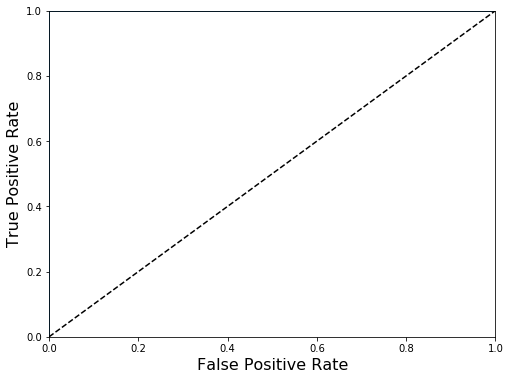

In [43]:
y_scores=best_rfe2.estimator_.decision_function(best_rfe2.transform(best_X2))
fpr, tpr, thresholds = roc_curve(best_Y2, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [44]:
# Area under curve
from sklearn.metrics import roc_auc_score
roc_auc_score(best_Y2, y_scores)

1.0

Since the dataset is quite small, I use upsampling to replicate minor class.

Use upsampled data to build a new model, for L=1, best p is still 4. Auc=1. Score=1.

## e - i

In [96]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import scale 
from sklearn import preprocessing

In [143]:
l_list=np.arange(1,21)
C=[]
best_p=[]
best_score=0
best_model=0
score=[]
for l in l_list:
    print(l)
    df_de=pd.DataFrame()
    file_list=[['bending1',2,7],['bending2',2,6],['cycling',3,15],['lying',3,15],['sitting',3,15],['standing',3,15],['walking',3,15]]
    for i in file_list:
        Label=i[0]
        for j in range(i[1]):
            add=i[0]+'/dataset'+str(j+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='test'
            table.append(Set)
            table.append(Label)
            df_de=df_de.append([table])
        for k in range(i[1],i[2]):
            add=i[0]+'/dataset'+str(k+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            
            if (i[0]=='bending2')&(k+1==4):
                add=i[0]+'/dataset'+str(k+1)+'.csv'
                data=pd.read_csv(add,skiprows=5,sep=' ',header=None,index_col=0)
                data.drop(7,axis=1,inplace=True)
                num=len(data)//l
                data_tem=data.iloc[0:num,:]
                for h in range(1,l):
                    data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
                table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='train'
            table.append(Set)
            table.append(Label)
            df_de=df_de.append([table])
           
    #Data processing
    df_de_train=df_de[df_de.iloc[:,-2]=='train']
    df_de_test=df_de[df_de.iloc[:,-2]=='test']
    
    df_de_train['bending']=(df_de_train.iloc[:,-1]=='bending1')|(df_de_train.iloc[:,-1]=='bending2')
    df_de_test['bending']=(df_de_test.iloc[:,-1]=='bending1')|(df_de_test.iloc[:,-1]=='bending2')
    
    #Find out the best P
    X=df_de_train.iloc[:,:-3]
    Y=df_de_train.iloc[:,-1]
    Xt=df_de_test.iloc[:,:-3]
    Yt=df_de_test.iloc[:,-1]
    
    # normalized data
    X=scale(X)
    Xt=scale(Xt)

    # build a model
    model=LogisticRegressionCV(cv=5,solver='liblinear',penalty='l1') 
    model.fit(X,Y)
    ms=model.scores_[1]
    high=max(ms.mean(axis=0))
    score.append(high)
    C.append(model.C_)
    if best_score<score[-1]:
        best_score=score[-1]
        best_model=model
        best_X=X
        best_Y=Y
        best_test=Xt    
        testY=Yt
result=pd.DataFrame([l_list,C,score],index=['l','C','score'])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [144]:
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
l,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
C,[0.3593813663804626],[0.3593813663804626],[0.3593813663804626],[0.3593813663804626],[2.782559402207126],[0.3593813663804626],[0.3593813663804626],[0.3593813663804626],[2.782559402207126],[166.81005372000558],[2.782559402207126],[2.782559402207126],[0.3593813663804626],[0.3593813663804626],[2.782559402207126],[0.3593813663804626],[21.54434690031882],[0.3593813663804626],[0.3593813663804626],[21.54434690031882]
score,0.971429,0.957143,0.971429,0.957143,0.941758,0.957143,0.941758,0.941758,0.941758,0.957143,0.957143,0.957143,0.942857,0.942857,0.941758,0.927473,0.942857,0.957143,0.957143,0.942857


For L1-penalized model, normalized the data.

## e-ii

In [145]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = best_model.predict(best_X)
confusion_matrix(best_Y, y_train_pred)

array([[60,  0],
       [ 1,  8]])

In [146]:
# get test score for L1 penalty
best_model.score(best_test,testY)

0.8947368421052632

 -----(E-ii)------
 
 d-iii modele has the test score = 1.
 
 L1-penalized model has the test score =0.894. Best L = 1
 
 Therefore d-iii model performs better. 
 
 L1-penalized model needs to normalize data since it is very sensitive to scale.
 d-iii model is not influenced a lot by scale.
 Technically L1 is easier to implement since it doesn't need use cross-validation twice and compute faster..

## f - i

In [148]:
l_list=np.arange(1,21)
C=[]
best_p=[]
best_score=0
best_model=0
score=[]
for l in l_list:
    print(l)
    df_f=pd.DataFrame()
    file_list=[['bending1',2,7],['bending2',2,6],['cycling',3,15],['lying',3,15],['sitting',3,15],['standing',3,15],['walking',3,15]]
    for i in file_list:
        Label=i[0]
        for j in range(i[1]):
            add=i[0]+'/dataset'+str(j+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='test'
            table.append(Set)
            table.append(Label)
            df_f=df_f.append([table])
        for k in range(i[1],i[2]):
            add=i[0]+'/dataset'+str(k+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            if (i[0]=='bending2')&(k+1==4):
                add=i[0]+'/dataset'+str(k+1)+'.csv'
                data=pd.read_csv(add,skiprows=5,sep=' ',header=None,index_col=0)
                data.drop(7,axis=1,inplace=True)
                num=len(data)//l
                data_tem=data.iloc[0:num,:]
                for h in range(1,l):
                    data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
                table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='train'
            table.append(Set)
            table.append(Label)
            df_f=df_f.append([table])
            
    #Data processing
    df_f.replace({'bending1':'bending','bending2':'bending'},inplace=True)
    df_f_train=df_f[df_f.iloc[:,-2]=='train']
    df_f_test=df_f[df_f.iloc[:,-2]=='test']
    
    #Find out the best P
    X=df_f_train.iloc[:,:-2]
    Y=df_f_train.iloc[:,-1]
    Xt=df_f_test.iloc[:,:-2]
    Yt=df_f_test.iloc[:,-1]
    
    # normalized data
    X=scale(X)
    Xt=scale(Xt)
    
    # build model
    model=LogisticRegressionCV(cv=5,solver='saga',penalty='l1',multi_class='multinomial') 
    model.fit(X,Y)
    score.append(model.score(X,Y))
    C.append(model.C_)
    if best_score<score[-1]:
        best_score=score[-1]
        best_model=model
        best_X=X
        best_Y=Y
        best_test=Xt
        testY=Yt
result=pd.DataFrame([l_list,C,score],index=['l','C','score'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [149]:
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
l,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
C,"[2.782559402207126, 2.782559402207126, 2.78255...","[10000.0, 10000.0, 10000.0, 10000.0, 10000.0, ...","[2.782559402207126, 2.782559402207126, 2.78255...","[1291.5496650148827, 1291.5496650148827, 1291....","[166.81005372000558, 166.81005372000558, 166.8...","[0.3593813663804626, 0.3593813663804626, 0.359...","[1291.5496650148827, 1291.5496650148827, 1291....","[166.81005372000558, 166.81005372000558, 166.8...","[21.54434690031882, 21.54434690031882, 21.5443...","[21.54434690031882, 21.54434690031882, 21.5443...","[0.3593813663804626, 0.3593813663804626, 0.359...","[0.3593813663804626, 0.3593813663804626, 0.359...","[21.54434690031882, 21.54434690031882, 21.5443...","[166.81005372000558, 166.81005372000558, 166.8...","[0.3593813663804626, 0.3593813663804626, 0.359...","[0.3593813663804626, 0.3593813663804626, 0.359...","[0.3593813663804626, 0.3593813663804626, 0.359...","[0.3593813663804626, 0.3593813663804626, 0.359...","[0.3593813663804626, 0.3593813663804626, 0.359...","[0.3593813663804626, 0.3593813663804626, 0.359..."
score,0.985507,1,1,1,1,0.971014,1,1,1,1,0.985507,1,1,1,1,1,0.985507,1,1,1


In [150]:
y_train_pred = best_model.predict(best_X)
confusion_matrix(best_Y, y_train_pred)

array([[ 9,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0, 12]])

In [151]:
# get test score
best_model.score(best_test,testY)

0.8421052631578947

-------(F-i)--------

For multinomial task, the model score = 0.84， best L = 2

#### research on how confusion matrices and ROC curves are defined for multiclass classification
The best answer could be to treat the multiclass as a binary classification problem that is consider one vs all and calculate the operating points for each class and then average it out for the entire classifier. 

## f-ii  GaussianNB 

In [126]:
from sklearn.naive_bayes import GaussianNB

In [127]:
l_list=np.arange(1,21)
best_p=[]
best_score=0
best_model=0
score=[]
for l in l_list:
    print(l)
    df_f=pd.DataFrame()
    file_list=[['bending1',2,7],['bending2',2,6],['cycling',3,15],['lying',3,15],['sitting',3,15],['standing',3,15],['walking',3,15]]
    for i in file_list:
        Label=i[0]
        for j in range(i[1]):
            add=i[0]+'/dataset'+str(j+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='test'
            table.append(Set)
            table.append(Label)
            df_f=df_f.append([table])
        for k in range(i[1],i[2]):
            add=i[0]+'/dataset'+str(k+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            if (i[0]=='bending2')&(k+1==4):
                add=i[0]+'/dataset'+str(k+1)+'.csv'
                data=pd.read_csv(add,skiprows=5,sep=' ',header=None,index_col=0)
                data.drop(7,axis=1,inplace=True)
                num=len(data)//l
                data_tem=data.iloc[0:num,:]
                for h in range(1,l):
                    data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
                table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='train'
            table.append(Set)
            table.append(Label)
            df_f=df_f.append([table])
            
    #Data processing
    df_f_train=df_f[df_f.iloc[:,-2]=='train']
    df_f_test=df_f[df_f.iloc[:,-2]=='test']
    #Find out the best P
    X=df_f_train.iloc[:,:-2]
    Y=df_f_train.iloc[:,-1]
    model=GaussianNB()
    model.fit(X,Y)
    score.append(model.score(X,Y))
    if best_score<score[-1]:
        best_score=score[-1]
        best_model=model
        best_X=X
        best_Y=Y
        best_test=df_f_test
result=pd.DataFrame([l_list,score],index=['l','score'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [128]:
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
l,1.0,2.0,3.000000,4.0,5.000000,6.000000,7.0,8.000000,9.0,10.0,11.000000,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
score,1.0,1.0,0.985507,1.0,0.985507,0.971014,1.0,0.985507,1.0,1.0,0.985507,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [129]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = best_model.predict(best_X)
confusion_matrix(best_Y, y_train_pred)

array([[ 5,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0,  0, 12]])

In [130]:
best_model.score(best_test.iloc[:,:-2], best_test.iloc[:,-1])

0.8947368421052632

For GaussianNB, the model score=0.895,   best L = 1

## multinomial

In [131]:
from sklearn.naive_bayes import MultinomialNB

In [132]:
l_list=np.arange(1,21)
best_p=[]
best_score=0
best_model=0
score=[]
for l in l_list:
    print(l)
    df_f=pd.DataFrame()
    file_list=[['bending1',2,7],['bending2',2,6],['cycling',3,15],['lying',3,15],['sitting',3,15],['standing',3,15],['walking',3,15]]
    for i in file_list:
        Label=i[0]
        for j in range(i[1]):
            add=i[0]+'/dataset'+str(j+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='test'
            table.append(Set)
            table.append(Label)
            df_f=df_f.append([table])
        for k in range(i[1],i[2]):
            add=i[0]+'/dataset'+str(k+1)+'.csv'
            data=pd.read_csv(add,skiprows=4,index_col=0)
            num=len(data)//l
            data_tem=data.iloc[0:num,:]
            for h in range(1,l):
                data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
            table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            if (i[0]=='bending2')&(k+1==4):
                add=i[0]+'/dataset'+str(k+1)+'.csv'
                data=pd.read_csv(add,skiprows=5,sep=' ',header=None,index_col=0)
                data.drop(7,axis=1,inplace=True)
                num=len(data)//l
                data_tem=data.iloc[0:num,:]
                for h in range(1,l):
                    data_tem=np.c_[data_tem,data.iloc[num*h:num*(h+1),:]]
                table=pd.DataFrame(data_tem).describe().T.iloc[:,[3,-1,1,-3,2,-4,-2]].values.reshape(1,-1)[0].tolist()
            Set='train'
            table.append(Set)
            table.append(Label)
            df_f=df_f.append([table])
            
    #Data processing
    df_f_train=df_f[df_f.iloc[:,-2]=='train']
    df_f_test=df_f[df_f.iloc[:,-2]=='test']
    #Find out the best P
    X=df_f_train.iloc[:,:-2]
    Y=df_f_train.iloc[:,-1]
    model=MultinomialNB()
    model.fit(X,Y)
    score.append(model.score(X,Y))
    if best_score<score[-1]:
        best_score=score[-1]
        best_model=model
        best_X=X
        best_Y=Y
        best_test=df_f_test
result=pd.DataFrame([l_list,score],index=['l','score'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [133]:
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
l,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000
score,0.927536,0.884058,0.898551,0.913043,0.927536,0.956522,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029,0.942029


In [134]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = best_model.predict(best_X)
confusion_matrix(best_Y, y_train_pred)

array([[ 5,  0,  0,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  1, 11,  0,  0],
       [ 0,  0,  0,  0,  1, 11,  0],
       [ 0,  0,  0,  0,  0,  0, 12]])

In [135]:
best_model.score(best_test.iloc[:,:-2], best_test.iloc[:,-1])

0.7368421052631579

Gaussian score = 0.895，   Best L =1

Multinomial score = 0.737,  Best L =6

Hence, Gaussian has a better score than Multinomial.

## 3.7.4

### (a)
We would expect RSS_train of the cubic regression is lower than RSS_train for linear regression.
Since n =100 it is not a big enough dataset, and if the true relationship is linear, 
it means that cubic regression has over fit. Therefore, cubic regression has lower RSS_train.


### (b)
We would expect RSS of the cubic regression is higher than RSS of linear regression.
Because cubic regression overfits the model, and would have more error than the linear
regression

### (c)
RSS of the cubic regression is lower than RSS of linear regression.
Because cubic regression fits better to the dataset.
cubic regression could make a tighter fit against data that matched with a wider irreducible error.

### (d)
There is no enough information for which RSS_test is higher. If true relationship is cose to linear,maybe linear works better, but if it is high dimensioned, cubic works better.

## 4.7.3

Please see the hand-written answer.

## -------------------------------------------------------------------------------